# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [19]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
from ggplot import * 
#import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print("Dataset has {} rows, {} columns".format(*data.shape))
print(data.head())  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

###PCA

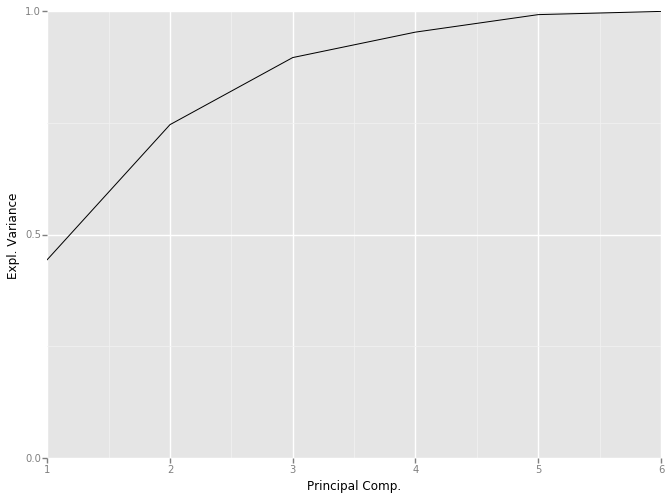

<ggplot: (8753596031857)>


,0,1,2,3,4,5
Principal Comp.,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
Fresh,-0.128201,-0.125030,-0.106942,-0.954641,-0.206818,-0.048803
Milk,-0.360556,0.402939,-0.125549,-0.164112,0.813955,-0.049212
Grocery,-0.219283,0.468091,-0.175565,0.014217,-0.305921,0.779868
Frozen,-0.442044,-0.485678,-0.723797,0.210010,-0.025253,-0.009458
Detergents_Paper,-0.180092,0.584026,-0.230954,0.096833,-0.422516,-0.620681
Delicatessen,-0.760028,-0.161026,0.603950,0.089691,-0.148184,-0.040855
Expl_Variance,0.443773,0.302483,0.150330,0.057015,0.039179,0.007220
Cum_Variance,0.443773,0.746256,0.896586,0.953601,0.992780,1.000000


In [38]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# Scale the data:
rs = RobustScaler()
scaled = rs.fit_transform(data)

# Build and run the PCA analysis with the number of components set to the original number 
# of features as requested. 
pca = PCA(n_components=data.shape[1])
pca.fit_transform(scaled)

# Print the components and the amount of variance in the data contained in each dimension
dispDF = pd.DataFrame(pca.components_)
dispDF.columns = data.columns
dispDF = dispDF.reset_index()
dispDF['index'] = dispDF['index'] + 1
dispDF = dispDF.rename(columns={'index':'Principal Comp.'})
dispDF['Expl_Variance'] = pca.explained_variance_ratio_
dispDF['Cum_Variance'] = dispDF['Expl_Variance'].cumsum()


plt = ggplot(dispDF, aes('Principal Comp.','Cum_Variance')) + geom_line() + ylab('Expl. Variance'
    ) + ylim(0,1) 
print(plt)

dispDF.T



**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
By the third principal component, we have almost 90% of the variance explained and by the fourth, 95%. 

**3)** What do the dimensions seem to represent? How can you use this information?


Answer: The dimensions appear to show relationships between what is frequently purchased together vs. not.

###ICA

In [ ]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = ?

# Print the independent components
print ica.components_

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [ ]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [ ]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = ?
print reduced_data[:10]  # print upto 10 elements

In [ ]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = ?
print clusters

In [ ]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = ?
print centroids

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 